<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

Train Data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r6/2-fft-normal-n-0-3-r6.csv?token=AKVFSOEYPQZGFT3QF7E2KVC6ZLO2S')
print(df.shape)
df

(38877, 30)


,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,76,4,2,4,1,1,5,17,23,7,0,0,1,4,1,0.25,8,5,1,5,5,25,8,4,4,4,20,85,100,1
1,77,4,2,4,2,2,5,17,23,7,0,0,1,4,1,0.25,9,4,2,5,8,40,8,8,16,16,20,85,100,1
2,78,4,2,4,3,2,5,17,23,7,0,0,1,4,1,0.25,10,3,3,5,9,45,8,12,24,24,20,85,100,1
3,79,4,2,4,4,2,5,17,23,7,0,0,1,4,1,0.25,11,2,4,5,8,40,8,16,32,32,20,85,100,1
4,83,4,2,4,5,3,5,17,23,7,0,0,1,4,1,0.25,15,1,5,5,5,25,8,20,60,60,20,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38872,3269000,2,0,6,4,2,3,10,22,6,23,7,20044,1,0,0.00,25,5,1,5,5,25,0,24,48,962112,18,30,54,1
38873,3269007,2,0,6,5,3,3,10,22,6,23,7,20044,1,0,0.00,32,4,2,5,8,40,0,30,90,1803960,18,30,54,1
38874,3269008,2,0,2,1,4,3,11,22,6,23,7,20045,1,0,0.00,32,3,3,5,9,45,0,2,8,160360,6,33,18,1
38875,3269009,2,0,7,1,4,3,12,22,6,3,3,20044,2,0,0.00,5,2,4,5,8,40,0,7,28,561232,21,36,63,1


In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r6/2-fft-malicious-n-0-3-m-1-r6.csv?token=AKVFSOGUVXSQD3RW67DO7JK6ZLO4Q', nrows=40000)
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r6/2-fft-malicious-n-0-3-m-6-r6.csv?token=AKVFSOCNJPVM62UN52A3CCK6ZLO4U', nrows=40000)
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r6/2-fft-malicious-n-0-3-m-9-r6.csv?token=AKVFSOG6YPAXNT62ITHNSUS6ZLO4W', nrows=40000)
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r6/2-fft-malicious-n-0-3-m-14-r6.csv?token=AKVFSOB4DMRQCFJ3SWJ3KOS6ZLO42', nrows=40000)

df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r6/2-fft-normal-n-0-5-r6.csv?token=AKVFSOB5FCGMVXNHSGPNUV26ZLO7S')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r6/2-fft-normal-n-0-12-r6.csv?token=AKVFSOAHW574B3VV6T7RF2C6ZLO7W')
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r6/2-fft-normal-n-0-15-r6.csv?token=AKVFSOBYBIUVIEVX57BHHBC6ZLO7Y')

In [0]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df11.shape)
print(df12.shape)
print(df13.shape)

(40000, 30)
(40000, 30)
(40000, 30)
(40000, 30)
(46730, 30)
(34261, 30)
(37247, 30)


In [0]:
df = df.append(df1, ignore_index=True,sort=False)
df = df.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)
df = df.append(df13, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [0]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,6,6,23,7,3,1,0,0.0,4,8,1,8,8,64,0,1,4,12,3,27,9,0
1,11,2,4,1,1,4,3,9,5,5,23,7,2,2,1,0.5,8,11,1,11,11,121,8,1,4,8,3,27,9,1
2,58,4,2,4,1,1,5,17,23,7,5,5,2,2,1,0.5,8,10,2,11,20,220,8,4,4,8,20,85,100,1
3,59,4,2,4,2,2,5,17,23,7,5,5,2,2,1,0.5,9,9,3,11,27,297,8,8,16,32,20,85,100,1
4,60,4,2,4,3,2,5,17,23,7,5,5,2,2,1,0.5,10,8,4,11,32,352,8,12,24,48,20,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317110,3275492,2,0,6,4,2,3,10,22,6,23,7,20059,1,0,0.0,25,2,10,11,20,220,0,24,48,962832,18,30,54,1
317111,3275499,2,0,6,5,3,3,10,22,6,23,7,20059,1,0,0.0,32,1,11,11,11,121,0,30,90,1805310,18,30,54,1
317112,3275500,2,0,2,1,4,3,11,22,6,23,7,20060,1,0,0.0,32,3,1,3,3,9,0,2,8,160480,6,33,18,1
317113,3275501,2,0,7,1,4,3,12,22,6,15,15,20059,3,0,0.0,5,2,2,3,4,12,0,7,28,561652,21,36,63,1


In [0]:
df.shape

(317115, 30)

Test Data

In [0]:
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r6/2-fft-malicious-n-0-3-m-2-r6.csv?token=AKVFSOAUVUBNU2XCAYJIWMS6ZLPDY', nrows=30000)
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r6/2-fft-malicious-n-0-3-m-5-r6.csv?token=AKVFSOHHTIKBLSIHVFIGDSS6ZLPDI', nrows=30000)
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r6/2-fft-malicious-n-0-3-m-10-r6.csv?token=AKVFSODJ3KAFEQPUSTDTTXK6ZLPDM', nrows=30000)
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r6/2-fft-malicious-n-0-3-m-12-r6.csv?token=AKVFSOFBZO3AFQ5LDZFQKAC6ZLPEQ', nrows=30000)
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r6/2-fft-malicious-n-0-3-m-13-r6.csv?token=AKVFSOAGYCH3X2COODWWXR26ZLPEU', nrows=30000)
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r6/2-fft-malicious-n-0-3-m-15-r6.csv?token=AKVFSOHCJYMJM22YUK6GM626ZLPEY', nrows=30000)

df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r6/2-fft-normal-n-0-10-r6.csv?token=AKVFSOF5CRLBIYVPMHBJEKS6ZLPJE', nrows=30000)
df5.shape

(30000, 30)

In [0]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,76,3,2,4,1,1,5,17,23,7,2,2,2,2,1,0.5,8,7,1,7,7,49,6,4,4,8,20,85,100,0
1,77,3,2,4,2,2,5,17,23,7,2,2,2,2,1,0.5,9,6,2,7,12,84,6,8,16,32,20,85,100,0
2,78,3,2,4,3,2,5,17,23,7,2,2,2,2,1,0.5,10,5,3,7,15,105,6,12,24,48,20,85,100,0
3,79,3,2,4,4,2,5,17,23,7,2,2,2,2,1,0.5,11,4,4,7,16,112,6,16,32,64,20,85,100,0
4,83,3,2,4,5,3,5,17,23,7,2,2,2,2,1,0.5,15,3,5,7,15,105,6,20,60,120,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1497355,2,4,4,2,2,5,17,20,4,3,3,10685,4,2,0.5,13,1,1,1,1,1,8,8,16,170960,20,85,100,0
29996,1497356,2,4,4,3,2,5,17,20,4,3,3,10685,4,2,0.5,14,1,1,1,1,1,8,12,24,256440,20,85,100,0
29997,1497357,2,4,4,4,2,5,17,20,4,3,3,10685,4,2,0.5,15,1,1,1,1,1,8,16,32,341920,20,85,100,0
29998,1497358,2,4,3,1,4,3,9,20,4,19,3,10685,4,2,0.5,16,1,1,1,1,1,8,3,12,128220,9,27,27,0


In [0]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [0]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.246591,-0.056104,-0.001695,0.002543,0.362014,0.372398,0.029969,0.191700,-0.478294,-0.640916,-0.413298,-0.074227,0.011469,-0.038829,-0.032111,-0.030916,0.588399,-0.058656,-0.037661,-0.013351,0.234563,0.367583,0.342687,0.125465
inport,-0.246591,1.000000,-0.073096,0.009004,-0.013579,0.070460,-0.005380,0.023062,0.376041,0.503093,0.483844,0.125987,-0.071399,-0.147827,-0.135633,-0.120872,-0.106415,0.577332,-0.013264,-0.017978,0.000989,-0.005710,0.039884,0.041651,0.056673
cache_coherence_type,-0.056104,-0.073096,1.000000,0.282644,-0.426392,-0.221966,-0.235867,0.056889,-0.173447,-0.126942,-0.102376,-0.132755,0.050237,-0.034955,0.009455,0.017713,0.020479,-0.114014,0.517223,0.411219,0.318487,0.653867,-0.228411,0.178868,0.009171
flit_id,-0.001695,0.009004,0.282644,1.000000,-0.028573,0.215044,0.195702,0.010382,0.068379,0.021067,-0.027696,0.372817,-0.036831,0.070223,0.020658,0.019192,0.011329,-0.003039,0.945450,0.907417,0.643430,0.400361,0.207968,0.330850,-0.001625
flit_type,0.002543,-0.013579,-0.426392,-0.028573,1.000000,-0.324426,-0.295247,-0.015681,-0.103163,-0.031776,0.041790,0.340555,-0.061156,0.073871,0.007866,-0.006556,-0.002753,0.004578,-0.098698,0.164680,0.113125,-0.603988,-0.313751,-0.499129,0.002461
vnet,0.362014,0.070460,-0.221966,0.215044,-0.324426,1.000000,0.985021,-0.053866,0.407151,-0.050283,-0.162205,-0.456641,-0.027292,0.036287,0.005564,0.000143,-0.012566,0.352350,0.009175,-0.030255,-0.057302,0.592599,0.997530,0.919627,-0.074769
vc,0.372398,-0.005380,-0.235867,0.195702,-0.295247,0.985021,1.000000,-0.057268,0.354679,-0.121306,-0.237217,-0.446987,-0.020849,0.059216,0.023737,0.017769,0.003432,0.298516,-0.007759,-0.040767,-0.067449,0.569492,0.994690,0.898913,-0.085552
traversal_id,0.029969,0.023062,0.056889,0.010382,-0.015681,-0.053866,-0.057268,1.000000,0.013240,0.005991,-0.012329,0.051794,-0.197186,-0.197179,-0.243991,-0.188993,-0.149070,0.040706,0.032083,0.024699,0.553297,0.005198,-0.055459,-0.031436,0.101216
hop_count,0.191700,0.376041,-0.173447,0.068379,-0.103163,0.407151,0.354679,0.013240,1.000000,0.571544,0.070045,-0.018910,-0.147773,-0.126467,-0.169671,-0.146857,-0.127958,0.420499,-0.057610,-0.055526,-0.036375,0.172649,0.387282,0.340961,0.113374
current_hop,-0.478294,0.503093,-0.126942,0.021067,-0.031776,-0.050283,-0.121306,0.005991,0.571544,1.000000,0.775168,0.383388,-0.051392,-0.134002,-0.114701,-0.101087,-0.086457,0.014195,-0.021734,-0.030581,-0.018881,-0.143886,-0.079339,-0.101876,0.029991


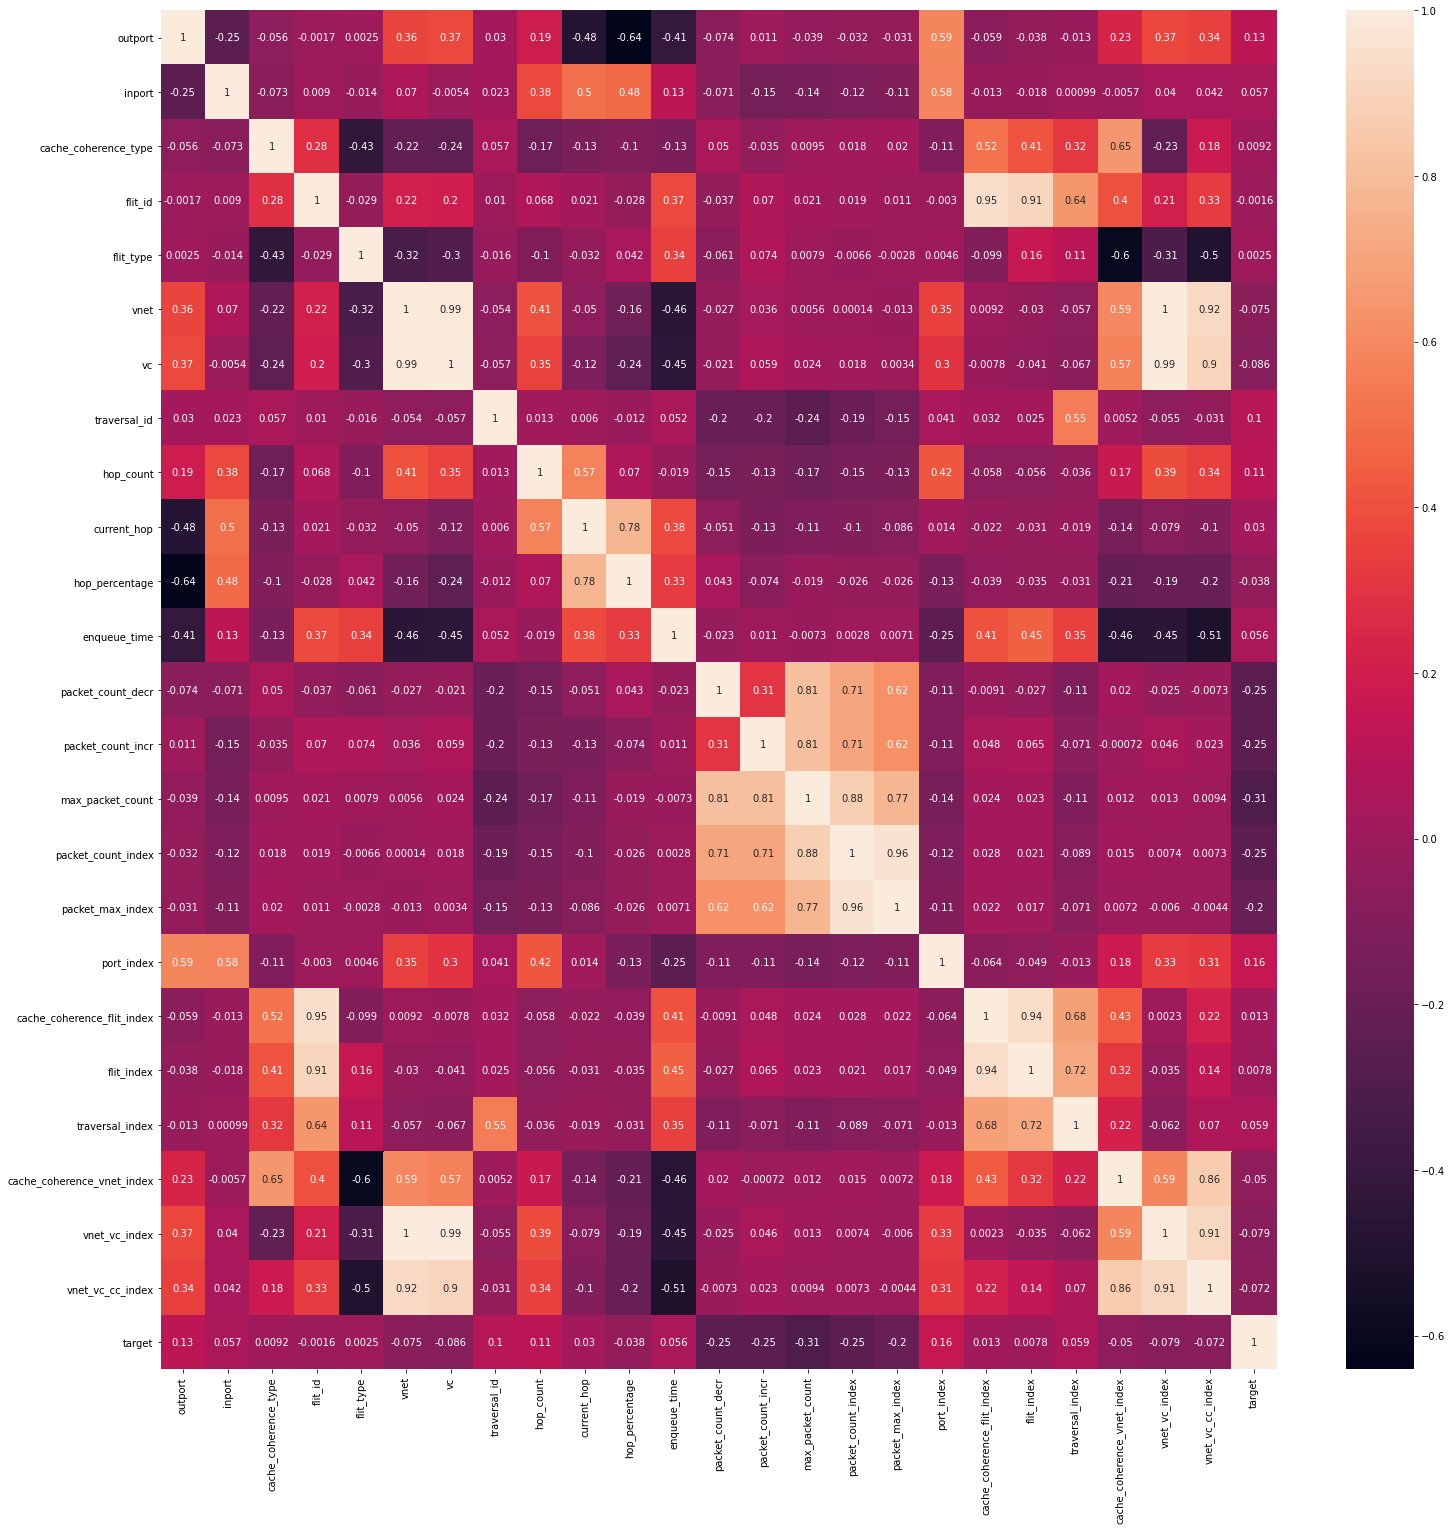

In [0]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,2,0,1,1,4,3,9,3,1,0,0.0,4,8,1,8,8,64,0,1,4,12,3,27,9
1,2,4,1,1,4,3,9,2,2,1,0.5,8,11,1,11,11,121,8,1,4,8,3,27,9
2,4,2,4,1,1,5,17,2,2,1,0.5,8,10,2,11,20,220,8,4,4,8,20,85,100
3,4,2,4,2,2,5,17,2,2,1,0.5,9,9,3,11,27,297,8,8,16,32,20,85,100
4,4,2,4,3,2,5,17,2,2,1,0.5,10,8,4,11,32,352,8,12,24,48,20,85,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317110,2,0,6,4,2,3,10,20059,1,0,0.0,25,2,10,11,20,220,0,24,48,962832,18,30,54
317111,2,0,6,5,3,3,10,20059,1,0,0.0,32,1,11,11,11,121,0,30,90,1805310,18,30,54
317112,2,0,2,1,4,3,11,20060,1,0,0.0,32,3,1,3,3,9,0,2,8,160480,6,33,18
317113,2,0,7,1,4,3,12,20059,3,0,0.0,5,2,2,3,4,12,0,7,28,561652,21,36,63


In [0]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,0.0,0.000000,0.00,1.000000,0.0,0.000000,0.000094,0.2,0.00,0.0,0.000000,0.200000,0.000000,0.200000,0.020528,0.005117,0.000000,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
1,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000047,0.4,0.25,0.5,0.062500,0.285714,0.000000,0.285714,0.029326,0.009747,0.666667,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000
2,1.0,0.5,0.500000,0.00,0.000000,1.0,0.888889,0.000047,0.4,0.25,0.5,0.062500,0.257143,0.028571,0.285714,0.055718,0.017789,0.666667,0.103448,0.000000,0.000002,0.944444,0.920635,1.000000
3,1.0,0.5,0.500000,0.25,0.333333,1.0,0.888889,0.000047,0.4,0.25,0.5,0.078125,0.228571,0.057143,0.285714,0.076246,0.024044,0.666667,0.241379,0.139535,0.000015,0.944444,0.920635,1.000000
4,1.0,0.5,0.500000,0.50,0.333333,1.0,0.888889,0.000047,0.4,0.25,0.5,0.093750,0.200000,0.085714,0.285714,0.090909,0.028511,0.666667,0.379310,0.232558,0.000023,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317110,0.5,0.0,0.833333,0.75,0.333333,0.0,0.111111,0.940895,0.2,0.00,0.0,0.328125,0.028571,0.257143,0.285714,0.055718,0.017789,0.000000,0.793103,0.511628,0.502070,0.833333,0.047619,0.494505
317111,0.5,0.0,0.833333,1.00,0.666667,0.0,0.111111,0.940895,0.2,0.00,0.0,0.437500,0.000000,0.285714,0.285714,0.029326,0.009747,0.000000,1.000000,1.000000,0.941383,0.833333,0.047619,0.494505
317112,0.5,0.0,0.166667,0.00,1.000000,0.0,0.222222,0.940942,0.2,0.00,0.0,0.437500,0.057143,0.000000,0.057143,0.005865,0.000650,0.000000,0.034483,0.046512,0.083681,0.166667,0.095238,0.098901
317113,0.5,0.0,1.000000,0.00,1.000000,0.0,0.333333,0.940895,0.6,0.00,0.0,0.015625,0.028571,0.028571,0.057143,0.008798,0.000894,0.000000,0.206897,0.279070,0.292873,1.000000,0.142857,0.593407


In [0]:
train_X[train_X.duplicated()].shape

(9887, 24)

In [0]:
test_X = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df5['target']

In [0]:
#standardization
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
test_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.75,0.5,0.500000,0.00,0.000000,1.0,0.888889,0.000094,0.25,0.25,0.5,0.062500,0.181818,0.000000,0.181818,0.019672,0.004614,0.500000,0.103448,0.000000,0.000004,0.944444,0.920635,1.000000
1,0.75,0.5,0.500000,0.25,0.333333,1.0,0.888889,0.000094,0.25,0.25,0.5,0.078125,0.151515,0.030303,0.181818,0.036066,0.007978,0.500000,0.241379,0.139535,0.000029,0.944444,0.920635,1.000000
2,0.75,0.5,0.500000,0.50,0.333333,1.0,0.888889,0.000094,0.25,0.25,0.5,0.093750,0.121212,0.060606,0.181818,0.045902,0.009997,0.500000,0.379310,0.232558,0.000046,0.944444,0.920635,1.000000
3,0.75,0.5,0.500000,0.75,0.333333,1.0,0.888889,0.000094,0.25,0.25,0.5,0.109375,0.090909,0.090909,0.181818,0.049180,0.010670,0.500000,0.517241,0.325581,0.000063,0.944444,0.920635,1.000000
4,0.75,0.5,0.500000,1.00,0.666667,1.0,0.888889,0.000094,0.25,0.25,0.5,0.171875,0.060606,0.121212,0.181818,0.045902,0.009997,0.500000,0.655172,0.651163,0.000121,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.50,1.0,0.500000,0.25,0.333333,1.0,0.888889,1.000000,0.75,0.50,0.5,0.140625,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.241379,0.139535,0.178091,0.944444,0.920635,1.000000
29996,0.50,1.0,0.500000,0.50,0.333333,1.0,0.888889,1.000000,0.75,0.50,0.5,0.156250,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.379310,0.232558,0.267139,0.944444,0.920635,1.000000
29997,0.50,1.0,0.500000,0.75,0.333333,1.0,0.888889,1.000000,0.75,0.50,0.5,0.171875,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.517241,0.325581,0.356186,0.944444,0.920635,1.000000
29998,0.50,1.0,0.333333,0.00,1.000000,0.0,0.000000,1.000000,0.75,0.50,0.5,0.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.068966,0.093023,0.133567,0.333333,0.000000,0.197802


In [0]:
test_X[test_X.duplicated()].shape

(0, 24)

In [0]:
test_X1 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df6['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)
test_X1

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000155,0.25,0.333333,0.500000,0.062500,0.233333,0.000000,0.233333,0.027451,0.007940,0.666667,0.000000,0.000000,0.000007,0.000000,0.000000,0.000000
1,1.00,0.5,0.500000,0.00,0.000000,1.0,0.888889,0.000155,0.25,0.333333,0.500000,0.062500,0.200000,0.033333,0.233333,0.050980,0.013989,0.666667,0.103448,0.000000,0.000007,0.944444,0.920635,1.000000
2,1.00,0.5,0.500000,0.25,0.333333,1.0,0.888889,0.000155,0.25,0.333333,0.500000,0.078125,0.166667,0.066667,0.233333,0.066667,0.018021,0.666667,0.241379,0.139535,0.000038,0.944444,0.920635,1.000000
3,1.00,0.5,0.500000,0.50,0.333333,1.0,0.888889,0.000155,0.25,0.333333,0.500000,0.093750,0.133333,0.100000,0.233333,0.074510,0.020038,0.666667,0.379310,0.232558,0.000058,0.944444,0.920635,1.000000
4,1.00,0.5,0.500000,0.75,0.333333,1.0,0.888889,0.000155,0.25,0.333333,0.500000,0.109375,0.100000,0.133333,0.233333,0.074510,0.020038,0.666667,0.517241,0.325581,0.000079,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.00,0.5,0.500000,0.50,0.333333,1.0,0.888889,0.999691,0.25,0.333333,0.500000,0.093750,0.066667,0.200000,0.266667,0.078431,0.023693,0.666667,0.379310,0.232558,0.266788,0.944444,0.920635,1.000000
29996,1.00,0.5,0.500000,0.75,0.333333,1.0,0.888889,0.999691,0.25,0.333333,0.500000,0.109375,0.033333,0.233333,0.266667,0.058824,0.018021,0.666667,0.517241,0.325581,0.355719,0.944444,0.920635,1.000000
29997,1.00,0.5,0.500000,1.00,0.666667,1.0,0.888889,0.999691,0.25,0.333333,0.500000,0.171875,0.000000,0.266667,0.266667,0.031373,0.010082,0.666667,0.655172,0.651163,0.666975,0.944444,0.920635,1.000000
29998,0.25,1.0,0.666667,0.00,0.000000,0.0,0.000000,1.000000,0.50,0.333333,0.333333,0.062500,0.366667,0.000000,0.366667,0.043137,0.018021,0.333333,0.137931,0.011628,0.055595,0.666667,0.000000,0.395604


In [0]:
test_X2 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df7['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)
test_X2

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.25,0.5,0.500000,0.00,0.000000,1.0,0.888889,0.000157,0.25,0.333333,0.5,0.070175,0.200000,0.000000,0.2,0.023529,0.006049,0.166667,0.103448,0.000000,0.000007,0.944444,0.920635,1.000000
1,0.25,0.5,0.500000,0.25,0.333333,1.0,0.888889,0.000157,0.25,0.333333,0.5,0.087719,0.166667,0.033333,0.2,0.043137,0.010460,0.166667,0.241379,0.139535,0.000038,0.944444,0.920635,1.000000
2,0.25,0.5,0.500000,0.50,0.333333,1.0,0.888889,0.000157,0.25,0.333333,0.5,0.105263,0.133333,0.066667,0.2,0.054902,0.013106,0.166667,0.379310,0.232558,0.000059,0.944444,0.920635,1.000000
3,0.25,0.5,0.500000,0.75,0.333333,1.0,0.888889,0.000157,0.25,0.333333,0.5,0.122807,0.100000,0.100000,0.2,0.058824,0.013989,0.166667,0.517241,0.325581,0.000080,0.944444,0.920635,1.000000
4,0.25,0.5,0.500000,1.00,0.666667,1.0,0.888889,0.000157,0.25,0.333333,0.5,0.192982,0.066667,0.133333,0.2,0.054902,0.013106,0.166667,0.655172,0.651163,0.000153,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.50,1.0,0.833333,0.50,0.333333,0.0,0.000000,0.999843,0.25,0.333333,0.5,0.315789,0.133333,0.066667,0.2,0.054902,0.013106,0.666667,0.586207,0.372093,0.399998,0.833333,0.000000,0.494505
29996,0.50,1.0,0.833333,0.75,0.333333,0.0,0.000000,0.999843,0.25,0.333333,0.5,0.438596,0.100000,0.100000,0.2,0.058824,0.013989,0.666667,0.793103,0.511628,0.533332,0.833333,0.000000,0.494505
29997,0.50,1.0,0.833333,1.00,0.666667,0.0,0.000000,0.999843,0.25,0.333333,0.5,0.561404,0.066667,0.133333,0.2,0.054902,0.013106,0.666667,1.000000,1.000000,1.000000,0.833333,0.000000,0.494505
29998,0.50,1.0,0.166667,0.00,1.000000,0.0,0.111111,1.000000,0.25,0.333333,0.5,0.561404,0.033333,0.166667,0.2,0.043137,0.010460,0.666667,0.034483,0.046512,0.088900,0.166667,0.047619,0.098901


In [0]:
test_X3 = df8.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df8['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)
test_X3

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.0,0.5,0.500000,0.00,0.000000,1.0,0.888889,0.000000,0.75,0.25,0.25,0.063492,0.200000,0.000000,0.200000,0.023529,0.006049,0.666667,0.103448,0.000000,0.000000,0.944444,0.920635,1.000000
1,1.0,0.5,0.500000,0.25,0.333333,1.0,0.888889,0.000000,0.75,0.25,0.25,0.079365,0.166667,0.033333,0.200000,0.043137,0.010460,0.666667,0.241379,0.139535,0.000008,0.944444,0.920635,1.000000
2,1.0,0.5,0.500000,0.50,0.333333,1.0,0.888889,0.000000,0.75,0.25,0.25,0.095238,0.133333,0.066667,0.200000,0.054902,0.013106,0.666667,0.379310,0.232558,0.000014,0.944444,0.920635,1.000000
3,1.0,0.5,0.500000,0.75,0.333333,1.0,0.888889,0.000000,0.75,0.25,0.25,0.111111,0.100000,0.100000,0.200000,0.058824,0.013989,0.666667,0.517241,0.325581,0.000020,0.944444,0.920635,1.000000
4,1.0,0.5,0.500000,1.00,0.666667,1.0,0.888889,0.000000,0.75,0.25,0.25,0.174603,0.066667,0.133333,0.200000,0.054902,0.013106,0.666667,0.655172,0.651163,0.000039,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.5,0.0,0.166667,0.00,1.000000,0.0,0.000000,1.000000,0.00,0.00,0.00,0.444444,0.233333,0.033333,0.266667,0.058824,0.018021,0.000000,0.034483,0.046512,0.088892,0.166667,0.000000,0.098901
29996,1.0,0.0,1.000000,0.00,1.000000,0.0,0.111111,0.999937,0.75,0.00,0.00,0.031746,0.200000,0.066667,0.266667,0.078431,0.023693,0.000000,0.206897,0.279070,0.311109,1.000000,0.047619,0.593407
29997,1.0,0.5,0.500000,0.00,0.000000,1.0,0.888889,1.000000,1.00,0.25,0.20,0.063492,0.166667,0.100000,0.266667,0.090196,0.027095,0.666667,0.103448,0.000000,0.044445,0.944444,0.920635,1.000000
29998,1.0,0.5,0.500000,0.25,0.333333,1.0,0.888889,1.000000,1.00,0.25,0.20,0.079365,0.133333,0.133333,0.266667,0.094118,0.028229,0.666667,0.241379,0.139535,0.177787,0.944444,0.920635,1.000000


In [0]:
test_X4 = df9.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df9['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)
test_X4

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.0,0.5,0.5,0.00,0.000000,1.0,0.888889,0.000126,0.75,0.333333,0.25,0.063492,0.206897,0.000000,0.206897,0.025105,0.006668,0.666667,0.103448,0.000000,0.000006,0.944444,0.920635,1.000000
1,1.0,0.5,0.5,0.25,0.333333,1.0,0.888889,0.000126,0.75,0.333333,0.25,0.079365,0.172414,0.034483,0.206897,0.046025,0.011529,0.666667,0.241379,0.139535,0.000031,0.944444,0.920635,1.000000
2,1.0,0.5,0.5,0.50,0.333333,1.0,0.888889,0.000126,0.75,0.333333,0.25,0.095238,0.137931,0.068966,0.206897,0.058577,0.014446,0.666667,0.379310,0.232558,0.000048,0.944444,0.920635,1.000000
3,1.0,0.5,0.5,0.75,0.333333,1.0,0.888889,0.000126,0.75,0.333333,0.25,0.111111,0.103448,0.103448,0.206897,0.062762,0.015419,0.666667,0.517241,0.325581,0.000065,0.944444,0.920635,1.000000
4,1.0,0.5,0.5,1.00,0.666667,1.0,0.888889,0.000126,0.75,0.333333,0.25,0.174603,0.068966,0.137931,0.206897,0.058577,0.014446,0.666667,0.655172,0.651163,0.000123,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.5,1.0,0.5,0.75,0.333333,1.0,0.888889,0.999622,0.75,0.666667,0.50,0.190476,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.517241,0.325581,0.356115,0.944444,0.920635,1.000000
29996,0.5,1.0,0.5,1.00,0.666667,1.0,0.888889,0.999622,0.75,0.666667,0.50,0.253968,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.655172,0.651163,0.667718,0.944444,0.920635,1.000000
29997,1.0,0.5,1.0,0.00,1.000000,0.0,0.000000,0.999937,0.75,0.333333,0.25,0.079365,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.206897,0.279070,0.311698,1.000000,0.000000,0.593407
29998,1.0,0.5,0.5,0.00,0.000000,1.0,0.888889,1.000000,0.75,0.333333,0.25,0.063492,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.103448,0.000000,0.044529,0.944444,0.920635,1.000000


In [0]:
test_X5 = df10.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df10['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)
test_X5

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.00,0.50,0.500000,0.00,0.000000,1.0,0.888889,0.000000,0.75,0.333333,0.25,0.070175,0.03125,0.00000,0.03125,0.003472,0.000315,0.666667,0.103448,0.000000,0.000000,0.944444,0.920635,1.000000
1,1.00,0.50,0.500000,0.25,0.333333,1.0,0.888889,0.000000,0.75,0.333333,0.25,0.087719,0.00000,0.03125,0.03125,0.003472,0.000315,0.666667,0.241379,0.139535,0.000009,0.944444,0.920635,1.000000
2,1.00,0.50,0.500000,0.50,0.333333,1.0,0.888889,0.000000,0.75,0.333333,0.25,0.105263,0.06250,0.00000,0.06250,0.006944,0.000839,0.666667,0.379310,0.232558,0.000015,0.944444,0.920635,1.000000
3,1.00,0.50,0.500000,0.75,0.333333,1.0,0.888889,0.000000,0.75,0.333333,0.25,0.122807,0.03125,0.03125,0.06250,0.010417,0.001154,0.666667,0.517241,0.325581,0.000021,0.944444,0.920635,1.000000
4,1.00,0.50,0.500000,1.00,0.666667,1.0,0.888889,0.000000,0.75,0.333333,0.25,0.192982,0.00000,0.06250,0.06250,0.006944,0.000839,0.666667,0.655172,0.651163,0.000043,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.50,1.00,0.500000,1.00,0.666667,1.0,0.888889,0.999517,1.00,0.666667,0.40,0.263158,0.00000,0.31250,0.31250,0.034722,0.012584,0.666667,0.655172,0.651163,0.666942,0.944444,0.920635,1.000000
29996,0.50,1.00,0.333333,0.00,1.000000,0.0,0.000000,0.999862,0.75,0.666667,0.50,0.210526,0.00000,0.00000,0.00000,0.000000,0.000000,0.666667,0.068966,0.093023,0.133432,0.333333,0.000000,0.197802
29997,0.75,0.25,0.666667,0.00,0.000000,0.0,0.000000,1.000000,0.75,1.000000,0.75,0.210526,0.00000,0.00000,0.00000,0.000000,0.000000,0.250000,0.137931,0.011628,0.055603,0.666667,0.000000,0.395604
29998,0.75,0.25,0.666667,0.25,0.333333,0.0,0.000000,1.000000,0.75,1.000000,0.75,0.333333,0.12500,0.00000,0.12500,0.013889,0.002517,0.250000,0.310345,0.186047,0.222419,0.666667,0.000000,0.395604


In [0]:
test_X6 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df14['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)
test_X6

(46, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.25,0.5,0.500000,0.00,0.000000,1.0,0.888889,0.000078,0.25,0.333333,0.5,0.070175,0.391304,0.000000,0.391304,0.058065,0.026449,0.166667,0.103448,0.000000,0.000003,0.944444,0.920635,1.000000
1,0.25,0.5,0.500000,0.25,0.333333,1.0,0.888889,0.000078,0.25,0.333333,0.5,0.087719,0.347826,0.043478,0.391304,0.109677,0.047823,0.166667,0.241379,0.139535,0.000024,0.944444,0.920635,1.000000
2,0.25,0.5,0.500000,0.50,0.333333,1.0,0.888889,0.000078,0.25,0.333333,0.5,0.105263,0.304348,0.086957,0.391304,0.148387,0.063853,0.166667,0.379310,0.232558,0.000038,0.944444,0.920635,1.000000
3,0.25,0.5,0.500000,0.75,0.333333,1.0,0.888889,0.000078,0.25,0.333333,0.5,0.122807,0.260870,0.130435,0.391304,0.174194,0.074539,0.166667,0.517241,0.325581,0.000052,0.944444,0.920635,1.000000
4,0.25,0.5,0.500000,1.00,0.666667,1.0,0.888889,0.000078,0.25,0.333333,0.5,0.192982,0.217391,0.173913,0.391304,0.187097,0.079882,0.166667,0.655172,0.651163,0.000100,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.00,0.5,0.333333,0.00,1.000000,0.0,0.000000,1.000000,0.25,0.333333,0.5,0.070175,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.068966,0.093023,0.133351,0.333333,0.000000,0.197802
29996,0.25,0.5,0.500000,0.00,0.000000,1.0,0.888889,1.000000,0.25,0.333333,0.5,0.087719,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.103448,0.000000,0.044448,0.944444,0.920635,1.000000
29997,0.25,0.5,0.500000,0.25,0.333333,1.0,0.888889,1.000000,0.25,0.333333,0.5,0.105263,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.241379,0.139535,0.177803,0.944444,0.920635,1.000000
29998,0.25,0.5,0.500000,0.50,0.333333,1.0,0.888889,1.000000,0.25,0.333333,0.5,0.122807,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.379310,0.232558,0.266706,0.944444,0.920635,1.000000


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [0]:
train_Y = df['target']
train_Y.value_counts()

0    160000
1    157115
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
14            max_packet_count  6363.998470
12           packet_count_decr  3189.668498
13           packet_count_incr  3174.332471
15          packet_count_index  2407.044399
16            packet_max_index  1355.492967
17                  port_index  1303.862939
5                         vnet   876.108874
6                           vc   871.517934
22               vnet_vc_index   846.935928
0                      outport   786.115243
7                 traversal_id   435.589232
8                    hop_count   275.192721
23            vnet_vc_cc_index   238.112228
20             traversal_index   163.682116
1                       inport   141.600184
11                enqueue_time    96.262658
21  cache_coherence_vnet_index    63.413694


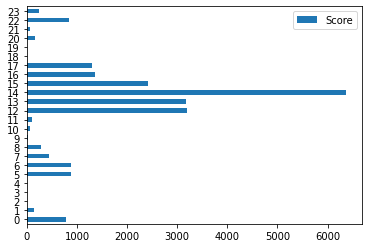

In [0]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [0]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 66.7100263311417
Test Prediction  66.72815855446763


In [0]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  76.36


In [0]:
y_pred_test = logreg.predict(test_X1)
logreg_score_test = accuracy_score(test_Y1,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  74.08666666666667


In [0]:
y_pred_test = logreg.predict(test_X2)
logreg_score_test = accuracy_score(test_Y2,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  83.62666666666667


In [0]:
y_pred_test = logreg.predict(test_X3)
logreg_score_test = accuracy_score(test_Y3,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  59.309999999999995


In [0]:
y_pred_test = logreg.predict(test_X4)
logreg_score_test = accuracy_score(test_Y4,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  73.22


In [0]:
y_pred_test = logreg.predict(test_X5)
logreg_score_test = accuracy_score(test_Y5,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  81.10000000000001


In [0]:
y_pred_test = logreg.predict(test_X6)
logreg_score_test = accuracy_score(test_Y6,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  30.19333333333333


In [0]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
8,hop_count,2.541410
17,port_index,2.493714
10,hop_percentage,1.625848
16,packet_max_index,1.556049
15,packet_count_index,1.501150
11,enqueue_time,1.453340
3,flit_id,0.832249
6,vc,0.645064
2,cache_coherence_type,0.309889
19,flit_index,0.279629


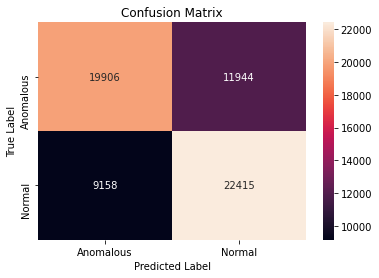

In [0]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.62      0.65     31850
           1       0.65      0.71      0.68     31573

    accuracy                           0.67     63423
   macro avg       0.67      0.67      0.67     63423
weighted avg       0.67      0.67      0.67     63423



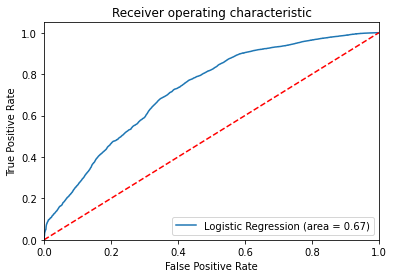

In [0]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

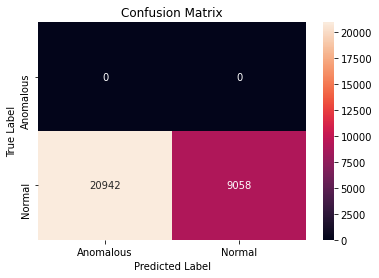

In [0]:
cm = confusion_matrix(test_Y6, y_pred_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.30      0.46     30000

    accuracy                           0.30     30000
   macro avg       0.50      0.15      0.23     30000
weighted avg       1.00      0.30      0.46     30000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighbors Classifier

In [0]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [0]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 87.68112514387525
Test Prediction  80.83502830203554


In [0]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  57.96666666666667


In [0]:
y_pred_knn_test= knn.predict(test_X1)
knn_score_test = accuracy_score(test_Y1,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  42.02666666666667


In [0]:
y_pred_knn_test= knn.predict(test_X2)
knn_score_test = accuracy_score(test_Y2,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  75.47333333333334


In [0]:
y_pred_knn_test= knn.predict(test_X3)
knn_score_test = accuracy_score(test_Y3,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  48.0


In [0]:
y_pred_knn_test= knn.predict(test_X4)
knn_score_test = accuracy_score(test_Y4,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  52.57333333333334


In [0]:
y_pred_knn_test= knn.predict(test_X5)
knn_score_test = accuracy_score(test_Y5,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  46.72666666666667


In [0]:
y_pred_knn_test= knn.predict(test_X6)
knn_score_test = accuracy_score(test_Y6,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  32.23666666666667


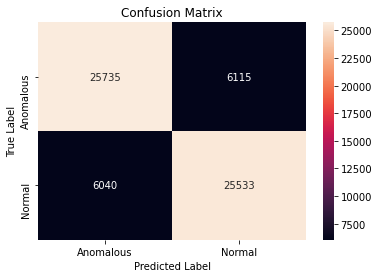

In [0]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81     31850
           1       0.81      0.81      0.81     31573

    accuracy                           0.81     63423
   macro avg       0.81      0.81      0.81     63423
weighted avg       0.81      0.81      0.81     63423



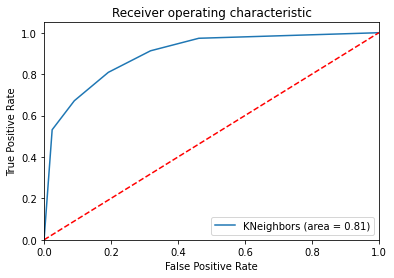

In [0]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

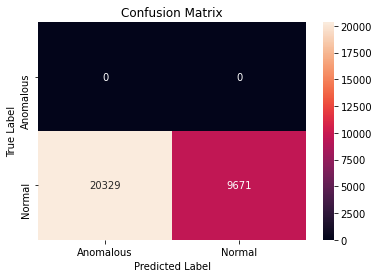

In [0]:
cm = confusion_matrix(test_Y6, y_pred_knn_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6,y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.32      0.49     30000

    accuracy                           0.32     30000
   macro avg       0.50      0.16      0.24     30000
weighted avg       1.00      0.32      0.49     30000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [0]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [0]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 61.460747678287056
Test Prediction Score 61.681093609573814


In [0]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)

Test Prediction Score 37.21


In [0]:
y_pred_nb_test= nb.predict(test_X1)
nb_score_test = accuracy_score(test_Y1,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  31.380000000000003


In [0]:
y_pred_nb_test= nb.predict(test_X2)
nb_score_test = accuracy_score(test_Y2,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  32.24333333333333


In [0]:
y_pred_nb_test= nb.predict(test_X3)
nb_score_test = accuracy_score(test_Y3,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  27.19666666666667


In [0]:
y_pred_nb_test= nb.predict(test_X4)
nb_score_test = accuracy_score(test_Y4,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  28.476666666666667


In [0]:
y_pred_nb_test= nb.predict(test_X5)
nb_score_test = accuracy_score(test_Y5,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  26.14


In [0]:
y_pred_nb_test= nb.predict(test_X6)
nb_score_test = accuracy_score(test_Y6,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  80.04


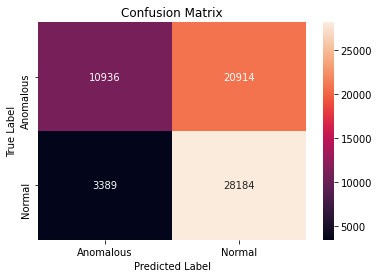

In [0]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.76      0.34      0.47     31850
           1       0.57      0.89      0.70     31573

    accuracy                           0.62     63423
   macro avg       0.67      0.62      0.59     63423
weighted avg       0.67      0.62      0.59     63423



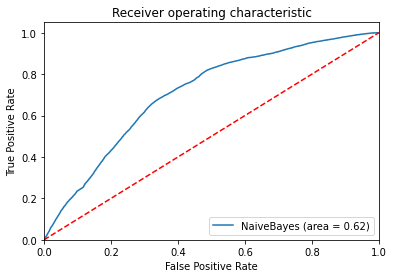

In [0]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

2-Layer Neural Network

In [0]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 202953 samples, validate on 50739 samples
Epoch 1/10
202953/202953 [==============================] - 8s 37us/step - loss: 0.2172 - accuracy: 0.6535 - val_loss: 0.2108 - val_accuracy: 0.6758
Epoch 2/10
202953/202953 [==============================] - 7s 37us/step - loss: 0.2071 - accuracy: 0.6800 - val_loss: 0.2054 - val_accuracy: 0.6882
Epoch 3/10
202953/202953 [==============================] - 7s 37us/step - loss: 0.2039 - accuracy: 0.6884 - val_loss: 0.2042 - val_accuracy: 0.6813
Epoch 4/10
202953/202953 [==============================] - 8s 37us/step - loss: 0.2028 - accuracy: 0.6878 - val_loss: 0.2033 - val_accuracy: 0.6841
Epoch 5/10
202953/202953 [==============================] - 8s 38us/step - loss: 0.2022 - accuracy: 0.6875 - val_loss: 0.2030 - val_accuracy: 0.6863
Epoch 6/10
202953/202953 [==============================] - 8s 38us/step - loss: 0.2017 - accuracy: 0.6894 - val_loss: 0.2024 - val_accuracy: 0.6902
Epoch 7/10
202953/202953 [=============================

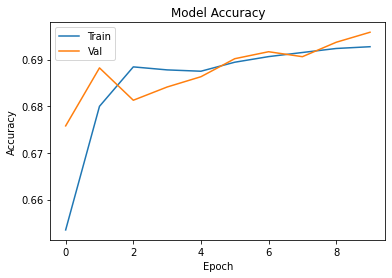

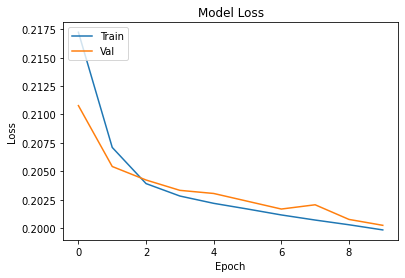

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 69.53%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 64.49%


In [0]:
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 53.82%


In [0]:
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 65.89%


In [0]:
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 49.02%


In [0]:
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 50.57%


In [0]:
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 48.14%


In [0]:
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 50.17%


3-Layer Neural Network

In [0]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2 )

Train on 202953 samples, validate on 50739 samples
Epoch 1/30
202953/202953 [==============================] - 8s 40us/step - loss: 0.2501 - accuracy: 0.5044 - val_loss: 0.2500 - val_accuracy: 0.5048
Epoch 2/30
202953/202953 [==============================] - 8s 37us/step - loss: 0.2500 - accuracy: 0.5052 - val_loss: 0.2499 - val_accuracy: 0.5048
Epoch 3/30
202953/202953 [==============================] - 8s 38us/step - loss: 0.2499 - accuracy: 0.5051 - val_loss: 0.2499 - val_accuracy: 0.5048
Epoch 4/30
202953/202953 [==============================] - 8s 37us/step - loss: 0.2499 - accuracy: 0.5052 - val_loss: 0.2499 - val_accuracy: 0.5048
Epoch 5/30
202953/202953 [==============================] - 8s 38us/step - loss: 0.2492 - accuracy: 0.5425 - val_loss: 0.2480 - val_accuracy: 0.5815
Epoch 6/30
202953/202953 [==============================] - 7s 36us/step - loss: 0.2452 - accuracy: 0.5951 - val_loss: 0.2414 - val_accuracy: 0.6051
Epoch 7/30
202953/202953 [=============================

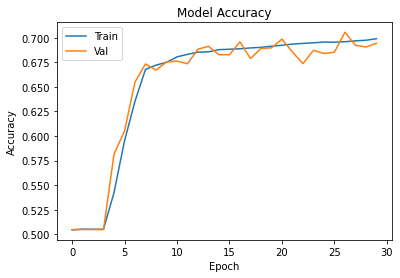

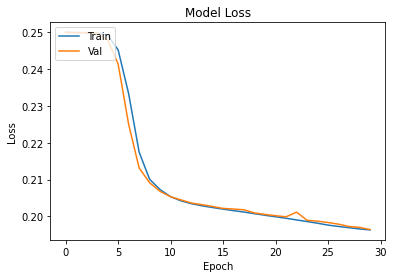

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 69.59%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 82.20%
accuracy: 75.72%
accuracy: 88.29%
accuracy: 55.44%
accuracy: 75.48%
accuracy: 83.21%
accuracy: 20.90%


4-Layer Neural Network



In [0]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 202953 samples, validate on 50739 samples
Epoch 1/30
202953/202953 [==============================] - 8s 37us/step - loss: 0.2448 - accuracy: 0.5637 - val_loss: 0.2313 - val_accuracy: 0.6136
Epoch 2/30
202953/202953 [==============================] - 8s 38us/step - loss: 0.2180 - accuracy: 0.6483 - val_loss: 0.2117 - val_accuracy: 0.6652
Epoch 3/30
202953/202953 [==============================] - 8s 37us/step - loss: 0.2095 - accuracy: 0.6691 - val_loss: 0.2077 - val_accuracy: 0.6768
Epoch 4/30
202953/202953 [==============================] - 8s 38us/step - loss: 0.2057 - accuracy: 0.6812 - val_loss: 0.2044 - val_accuracy: 0.6821
Epoch 5/30
202953/202953 [==============================] - 10s 49us/step - loss: 0.2022 - accuracy: 0.6923 - val_loss: 0.2009 - val_accuracy: 0.6963
Epoch 6/30
202953/202953 [==============================] - 8s 39us/step - loss: 0.1986 - accuracy: 0.6986 - val_loss: 0.1968 - val_accuracy: 0.6974
Epoch 7/30
202953/202953 [============================

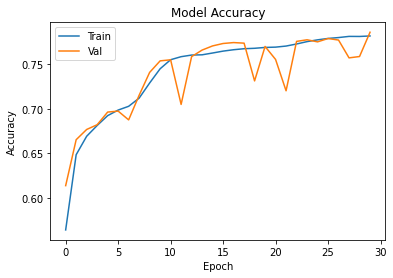

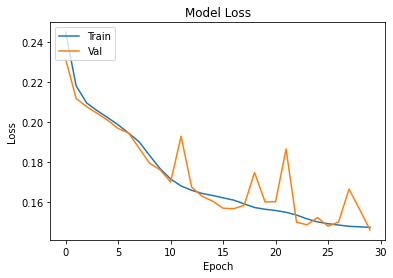

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 78.16%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 70.00%
accuracy: 55.14%
accuracy: 83.04%
accuracy: 54.59%
accuracy: 72.73%
accuracy: 60.61%
accuracy: 27.32%


5-Layer Neural Network Optimized

In [0]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 202953 samples, validate on 50739 samples
Epoch 1/100
202953/202953 [==============================] - 14s 71us/step - loss: 0.1690 - accuracy: 0.7478 - val_loss: 0.1514 - val_accuracy: 0.7785
Epoch 2/100
202953/202953 [==============================] - 14s 69us/step - loss: 0.1570 - accuracy: 0.7668 - val_loss: 0.1508 - val_accuracy: 0.7792
Epoch 3/100
202953/202953 [==============================] - 14s 68us/step - loss: 0.1546 - accuracy: 0.7709 - val_loss: 0.1458 - val_accuracy: 0.7832
Epoch 4/100
202953/202953 [==============================] - 14s 69us/step - loss: 0.1513 - accuracy: 0.7754 - val_loss: 0.1413 - val_accuracy: 0.7894
Epoch 5/100
202953/202953 [==============================] - 14s 70us/step - loss: 0.1480 - accuracy: 0.7799 - val_loss: 0.1423 - val_accuracy: 0.7916
Epoch 6/100
202953/202953 [==============================] - 15s 74us/step - loss: 0.1471 - accuracy: 0.7806 - val_loss: 0.1397 - val_accuracy: 0.7889
Epoch 7/100
202953/202953 [================

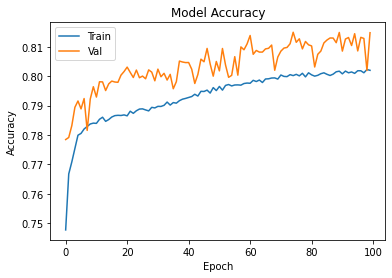

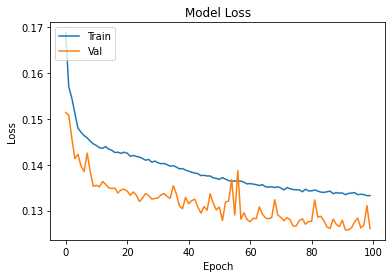

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 80.85%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 50.08%
accuracy: 38.43%
accuracy: 72.24%
accuracy: 40.86%
accuracy: 51.92%
accuracy: 43.91%
accuracy: 32.50%


In [0]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 202953 samples, validate on 50739 samples
Epoch 1/50
202953/202953 [==============================] - 16s 79us/step - loss: 0.1716 - accuracy: 0.7404 - val_loss: 0.1512 - val_accuracy: 0.7790
Epoch 2/50
202953/202953 [==============================] - 15s 76us/step - loss: 0.1588 - accuracy: 0.7630 - val_loss: 0.1483 - val_accuracy: 0.7799
Epoch 3/50
202953/202953 [==============================] - 15s 75us/step - loss: 0.1560 - accuracy: 0.7665 - val_loss: 0.1477 - val_accuracy: 0.7816
Epoch 4/50
202953/202953 [==============================] - 17s 83us/step - loss: 0.1546 - accuracy: 0.7687 - val_loss: 0.1462 - val_accuracy: 0.7824
Epoch 5/50
202953/202953 [==============================] - 15s 75us/step - loss: 0.1534 - accuracy: 0.7708 - val_loss: 0.1462 - val_accuracy: 0.7813
Epoch 6/50
202953/202953 [==============================] - 16s 77us/step - loss: 0.1525 - accuracy: 0.7723 - val_loss: 0.1461 - val_accuracy: 0.7802
Epoch 7/50
202953/202953 [=======================

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 80.25%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 40.54%
accuracy: 32.35%
accuracy: 62.92%
accuracy: 41.85%
accuracy: 36.11%
accuracy: 31.19%
accuracy: 43.25%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
dt = DecisionTreeClassifier(max_depth=24,max_features=24,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [0]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 95.52804187755231
Test Prediction Score 90.22121312457627


In [0]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 68.14333333333333
Test Prediction Score 53.13666666666666
Test Prediction Score 64.53999999999999
Test Prediction Score 51.44
Test Prediction Score 51.126666666666665
Test Prediction Score 47.736666666666665
Test Prediction Score 43.85666666666667


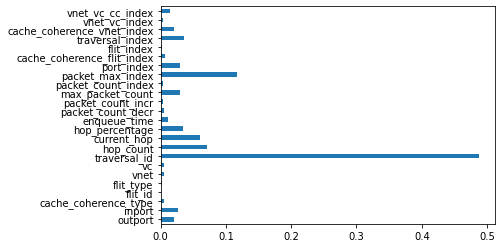

In [0]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

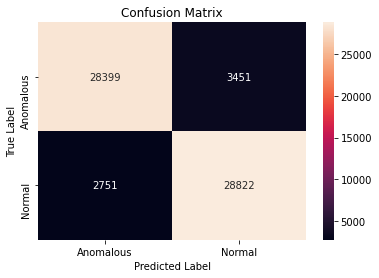

In [0]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90     31850
           1       0.89      0.91      0.90     31573

    accuracy                           0.90     63423
   macro avg       0.90      0.90      0.90     63423
weighted avg       0.90      0.90      0.90     63423



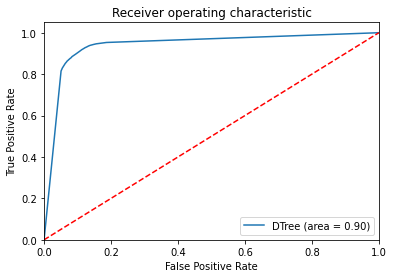

In [0]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(max_depth=24,max_features=24,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features=24,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [0]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 97.90809327846365
Test Prediction Score 91.08525298393327


In [0]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X1)
rf_score_test = accuracy_score(test_Y1,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X2)
rf_score_test = accuracy_score(test_Y2,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X3)
rf_score_test = accuracy_score(test_Y3,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X4)
rf_score_test = accuracy_score(test_Y4,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X5)
rf_score_test = accuracy_score(test_Y5,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X6)
rf_score_test = accuracy_score(test_Y6,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 68.10000000000001
Test Prediction Score 53.010000000000005
Test Prediction Score 65.35666666666667
Test Prediction Score 51.88333333333334
Test Prediction Score 51.77
Test Prediction Score 48.32
Test Prediction Score 44.27333333333333


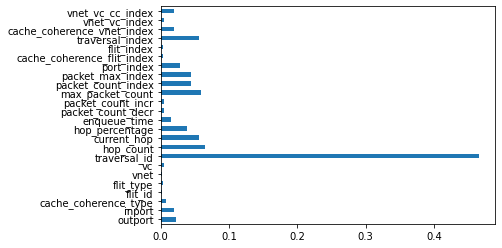

In [0]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

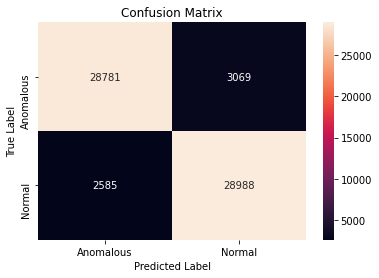

In [0]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91     31850
           1       0.90      0.92      0.91     31573

    accuracy                           0.91     63423
   macro avg       0.91      0.91      0.91     63423
weighted avg       0.91      0.91      0.91     63423



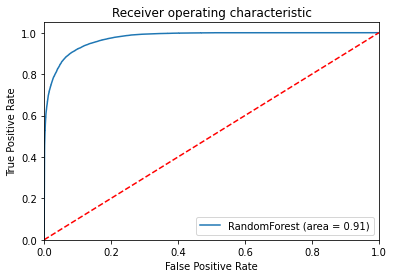

In [0]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [0]:
xgbc = XGBClassifier(max_depth=24,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [0]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 98.94123582927328
Test Prediction Score 93.48501332324236


In [0]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 66.5
Test Prediction Score 51.26666666666667
Test Prediction Score 69.28
Test Prediction Score 51.27
Test Prediction Score 50.32
Test Prediction Score 46.93333333333333
Test Prediction Score 37.14666666666667


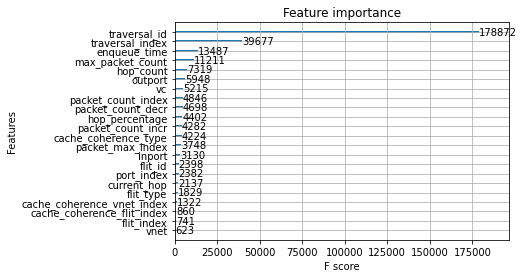

In [0]:
plot_importance(xgbc)
plt.show()

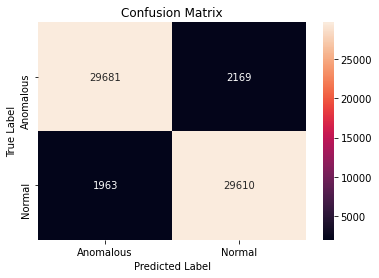

In [0]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     31850
           1       0.93      0.94      0.93     31573

    accuracy                           0.93     63423
   macro avg       0.93      0.93      0.93     63423
weighted avg       0.93      0.93      0.93     63423



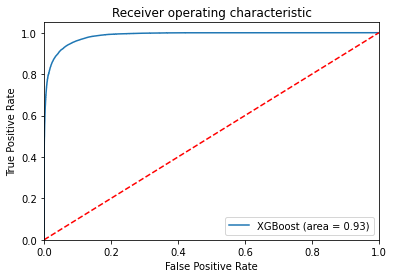

In [0]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [0]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 24, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=24,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [0]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 86.58964413540829
Test Prediction Score 85.44849660217902


In [0]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X1)
gbm_score_test = accuracy_score(test_Y1,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X2)
gbm_score_test = accuracy_score(test_Y2,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X3)
gbm_score_test = accuracy_score(test_Y3,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X4)
gbm_score_test = accuracy_score(test_Y4,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X5)
gbm_score_test = accuracy_score(test_Y5,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X6)
gbm_score_test = accuracy_score(test_Y6,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 75.66333333333334
Test Prediction Score 49.79333333333334
Test Prediction Score 74.33999999999999
Test Prediction Score 48.64666666666667
Test Prediction Score 49.50333333333333
Test Prediction Score 48.11666666666667
Test Prediction Score 34.93666666666667


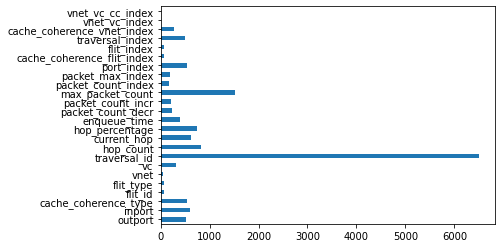

In [0]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

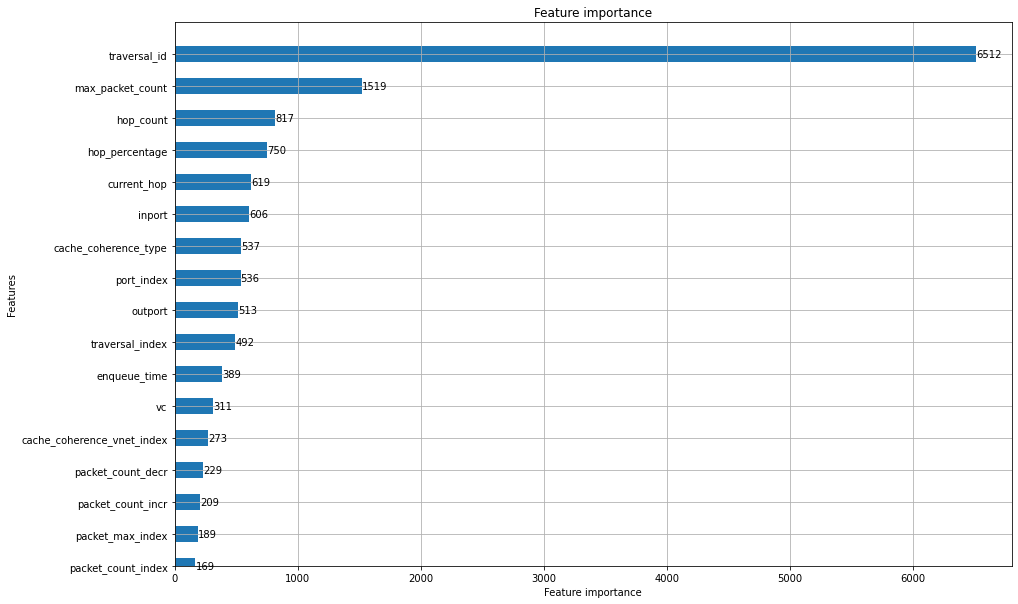

In [0]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6800), ylim = (0,17), figsize = (15,10))
plt.show()

In [0]:
sorted(gbm.feature_importances_,reverse=True)

[6512,
 1519,
 817,
 750,
 619,
 606,
 537,
 536,
 513,
 492,
 389,
 311,
 273,
 229,
 209,
 189,
 169,
 74,
 69,
 68,
 60,
 57,
 2,
 0]

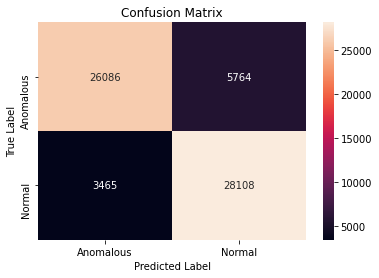

In [0]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [312]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85     31850
           1       0.83      0.89      0.86     31573

    accuracy                           0.85     63423
   macro avg       0.86      0.85      0.85     63423
weighted avg       0.86      0.85      0.85     63423



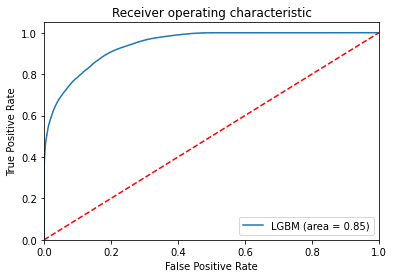

In [311]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()